In [2]:
import numpy as np
import pandas as pd

In [4]:
given_data=pd.read_csv(r"C:\Users\hgaikw\Downloads\DAX-Freshers-Training-main\DAX-Freshers-Training-main\healthcare-dataset-stroke-data.csv")

In [5]:
given_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
len(given_data)

5110

In [7]:
given_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df = given_data['bmi'].mean()

In [9]:
print(df)

28.893236911794666


In [10]:
given_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
import matplotlib.pyplot as plt

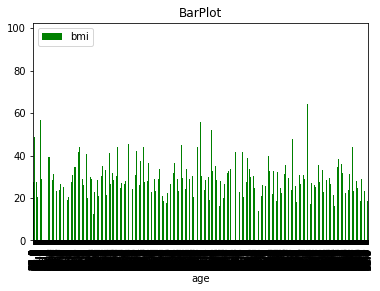

In [16]:
given_data.plot(kind = 'bar',
        x = 'age',
        y = 'bmi',
        color = 'green')
  
plt.title('BarPlot') 
plt.show()

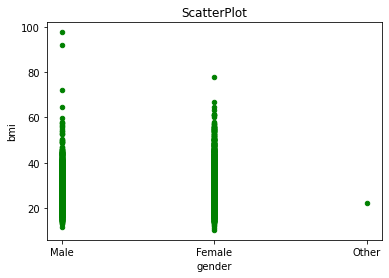

In [14]:
given_data.plot(kind = 'scatter',
        x = 'gender',
        y = 'bmi',
        color = 'green')
  
plt.title('ScatterPlot') 
plt.show()

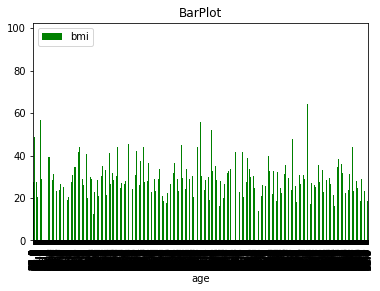

In [19]:
given_data.plot(kind = 'bar',
        x = 'age',
        y = 'bmi',
        color = 'green')
  
plt.title('BarPlot') 
plt.show()

In [20]:
given_data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [21]:
given_data['bmi'].isnull().values.any()

True

In [23]:
given_data. isnull(). sum() * 100 / len(given_data)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [25]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = given_data[col].mean()
        sd = given_data[col].std()
        
        given_data = given_data[(given_data[col] <= mean+(n_std*sd))]
        
    return given_data

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler(feature_range=(20, 500))
given_data[["ScaledPrice"]] = scaler.fit_transform(given_data[["bmi"]])
  
print(given_data)                                                                              #Scaling

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [35]:
pd.get_dummies(given_data, columns=["Residence_type"])                              #Encoding

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,ScaledPrice,Residence_type_Rural,Residence_type_Urban
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,164.604811,0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1,NaN,1,0
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,142.061856,1,0
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,152.508591,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,95.326460,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,83.75,NaN,never smoked,0,NaN,0,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,125.20,40.0,never smoked,0,183.298969,0,1
5107,19723,Female,35.0,0,0,Yes,Self-employed,82.99,30.6,never smoked,0,131.615120,1,0
5108,37544,Male,51.0,0,0,Yes,Private,166.29,25.6,formerly smoked,0,104.123711,1,0
